In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 12
A = np.matrix([
    [0, 3, 0, 2, 0, 1, 5, 4, 4, 0, 0, 1],
    [3, 0, 3, 2, 0, 3, 0, 4, 0, 5, 4, 4],
    [0, 3, 0, 0, 0, 0, 2, 0, 4, 1, 4, 5],
    [2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0],
    [1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [5, 0, 2, 1, 0, 0, 0, 4, 4, 0, 0, 5],
    [4, 4, 0, 0, 4, 0, 4, 0, 1, 2, 5, 4],
    [4, 0, 4, 0, 1, 0, 4, 1, 0, 0, 5, 0],
    [0, 5, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0],
    [0, 4, 4, 2, 0, 0, 0, 5, 5, 0, 0, 5],
    [1, 4, 5, 0, 0, 1, 5, 4, 0, 0, 5, 0],
])
G = nx.from_numpy_matrix(A)

In [3]:
def cycle_layout(k):
    pos = {}
    R = 15
    for i in range(k):
        pos[i] = (R * np.sin(2 * i * np.pi / k) ,R * np.cos(2 * i * np.pi / k))
    return pos

pos = cycle_layout(n)
G.edges(data=True)


EdgeDataView([(0, 1, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 1}), (0, 6, {'weight': 5}), (0, 7, {'weight': 4}), (0, 8, {'weight': 4}), (0, 11, {'weight': 1}), (1, 2, {'weight': 3}), (1, 3, {'weight': 2}), (1, 5, {'weight': 3}), (1, 7, {'weight': 4}), (1, 9, {'weight': 5}), (1, 10, {'weight': 4}), (1, 11, {'weight': 4}), (2, 6, {'weight': 2}), (2, 8, {'weight': 4}), (2, 9, {'weight': 1}), (2, 10, {'weight': 4}), (2, 11, {'weight': 5}), (3, 6, {'weight': 1}), (3, 9, {'weight': 1}), (3, 10, {'weight': 2}), (4, 7, {'weight': 4}), (4, 8, {'weight': 1}), (5, 11, {'weight': 1}), (6, 7, {'weight': 4}), (6, 8, {'weight': 4}), (6, 11, {'weight': 5}), (7, 8, {'weight': 1}), (7, 9, {'weight': 2}), (7, 10, {'weight': 5}), (7, 11, {'weight': 4}), (8, 10, {'weight': 5}), (10, 11, {'weight': 5})])

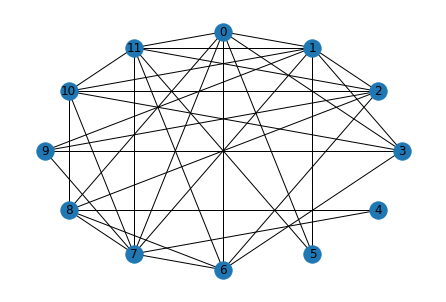

In [4]:
nx.draw(G, pos, with_labels=True)

In [5]:
used = [0 for i in range(n)]
p = [-1 for i in range(n)]

s = 0

def draw(with_start):
    plt.figure(dpi = 150)
    c = ['#e6e6fa', 'grey', 'yellow']
    node_colors = [c[x] for x in used]
    if with_start:
        node_colors[s] = 'green'
    colors = tuple(node_colors)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx(G, pos, edge_color = [G[x][y]['color'] for x, y in G.edges()],
                     node_color = colors, with_labels=True)
    plt.show()

def dfs(v):
    used[v] = 1
    
    if sum(used) == n:
        if v in G[s]:
            print(f"Гамильтонов цикл найден, S = {path(s)}")
            G[v][s]['color'] = 'red'
            draw(True)
            return True
        print(f"Ребра (v{v}, v{s}) нет, найдена гамильтонова цепь")
        print(f"Прибегнем к возвращению, удалим вершину v{v}")
        used[v] = 0
        return False
    for u in G[v]:
        if used[u] == 0:
            p[v] = u
            G[u][v]['color'] = 'red'
            used[u] = 2
            print(f"Возможная вершина: v{u}. S = {path(s)}")
            draw(True)
            G[u][v]['color'] = 'blue'
            if  dfs(u):
                return True
            p[v] = -1
            G[u][v]['color'] = 'black'
    used[v] = 0
    print(f"У вершины v{v} больше нет возможных вершин, удалим её")
    return False

def path(s):
    mas = []
    while s != -1:
        mas.append(f"v{s}")
        s = p[s]
    return mas

In [6]:
for x, y in G.edges():
    G[x][y]['color'] = 'black'

Для поиска гамильтонового цикла воспользуемся алгоритмом перебора с возвратом
Включаем в S вершину v0. S = ['v0']
Возможная вершина: v1. S = ['v0', 'v1']


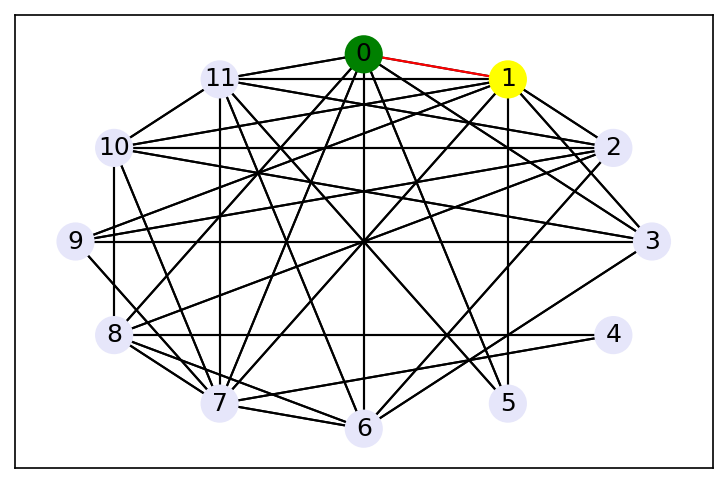

Возможная вершина: v2. S = ['v0', 'v1', 'v2']


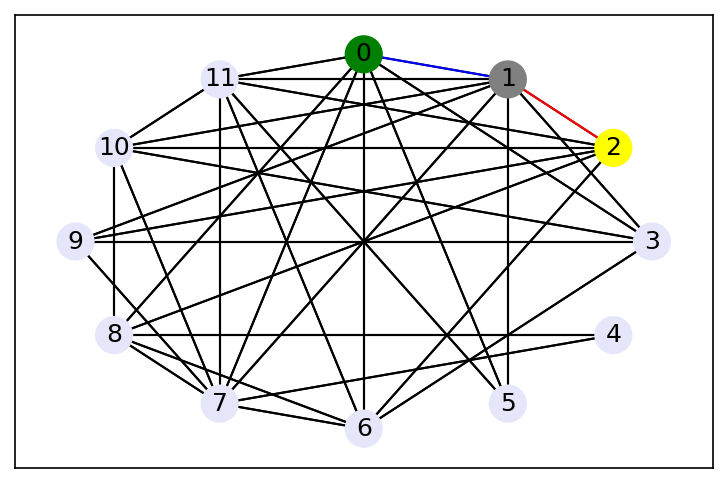

Возможная вершина: v6. S = ['v0', 'v1', 'v2', 'v6']


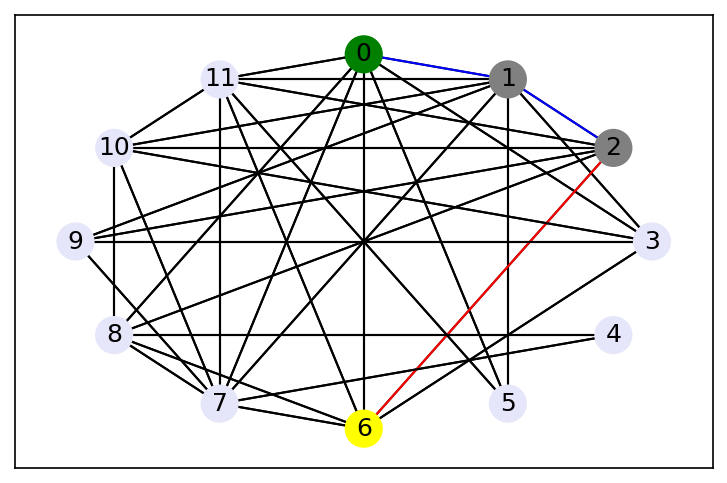

Возможная вершина: v3. S = ['v0', 'v1', 'v2', 'v6', 'v3']


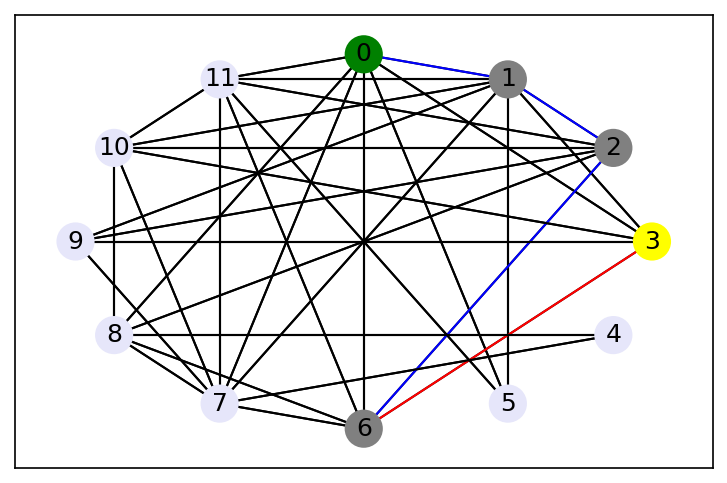

Возможная вершина: v9. S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9']


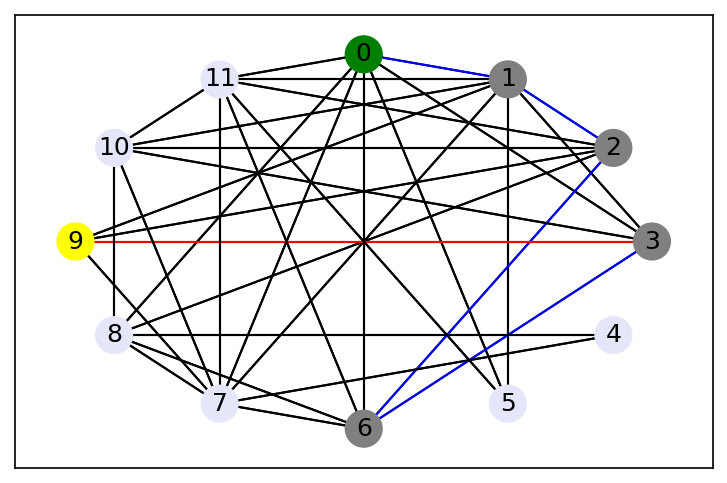

Возможная вершина: v7. S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7']


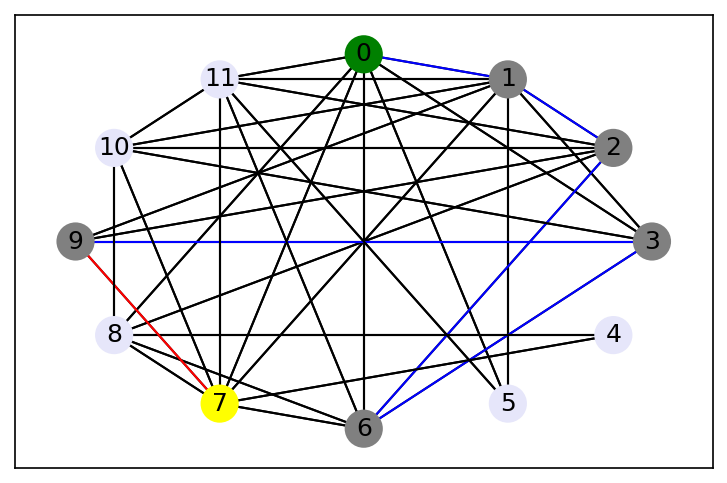

Возможная вершина: v4. S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7', 'v4']


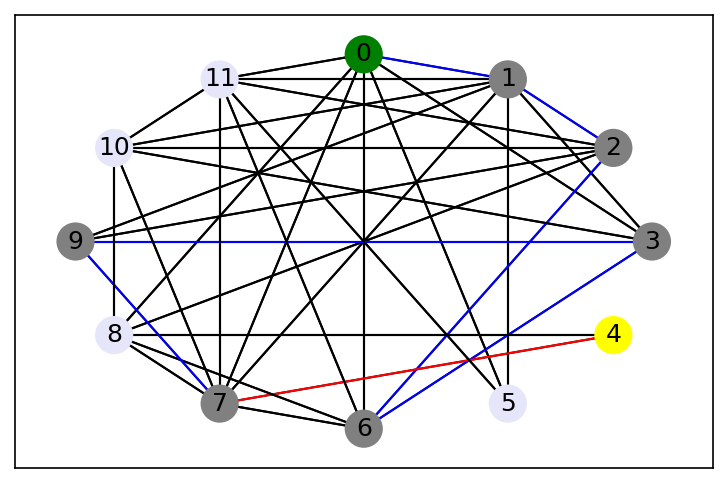

Возможная вершина: v8. S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7', 'v4', 'v8']


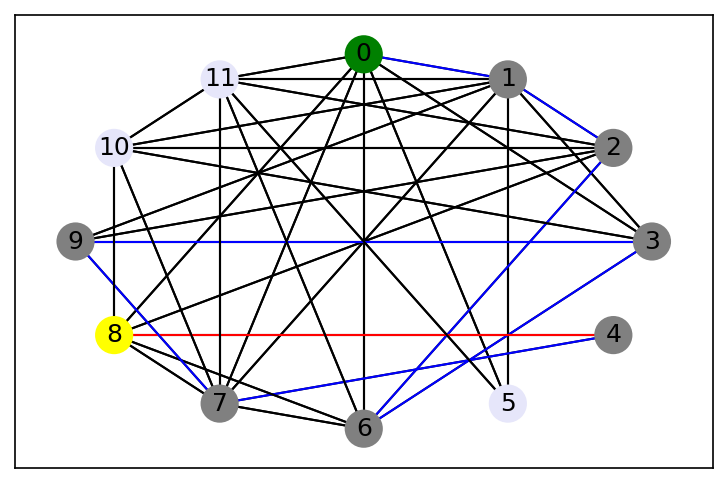

Возможная вершина: v10. S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7', 'v4', 'v8', 'v10']


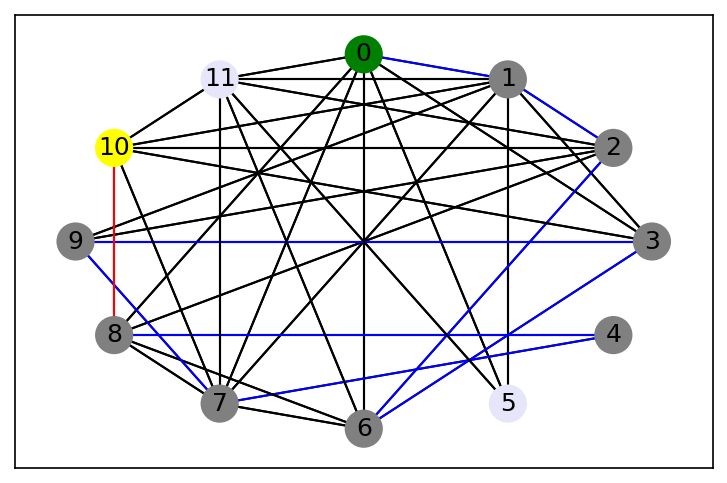

Возможная вершина: v11. S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7', 'v4', 'v8', 'v10', 'v11']


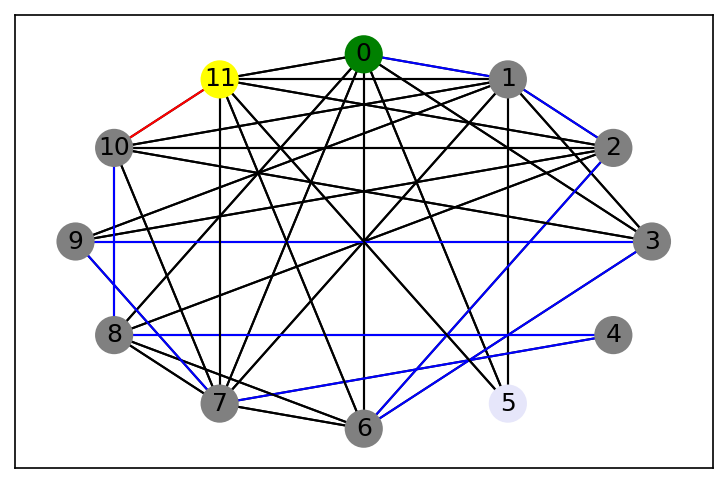

Возможная вершина: v5. S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7', 'v4', 'v8', 'v10', 'v11', 'v5']


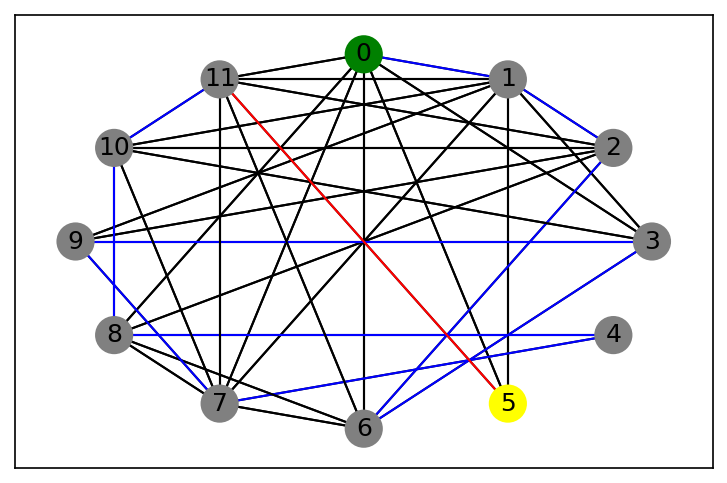

Гамильтонов цикл найден, S = ['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7', 'v4', 'v8', 'v10', 'v11', 'v5']


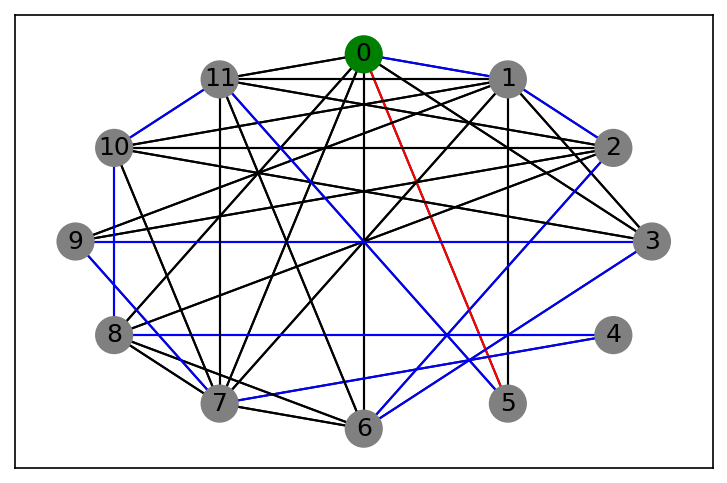

True

In [7]:
print("Для поиска гамильтонового цикла воспользуемся алгоритмом перебора с возвратом")
print(f"Включаем в S вершину v{s}. S = {path(s)}")
dfs(s)
    

In [8]:
print("До перенумерации\t" + str(path(s)))
print(f"После перенумерации\t" + str([f"v{i}" for i in range(n)]))

До перенумерации	['v0', 'v1', 'v2', 'v6', 'v3', 'v9', 'v7', 'v4', 'v8', 'v10', 'v11', 'v5']
После перенумерации	['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11']


In [9]:
way = [int(v.replace("v", '')) for v in path(s)]

Переименуем вершины


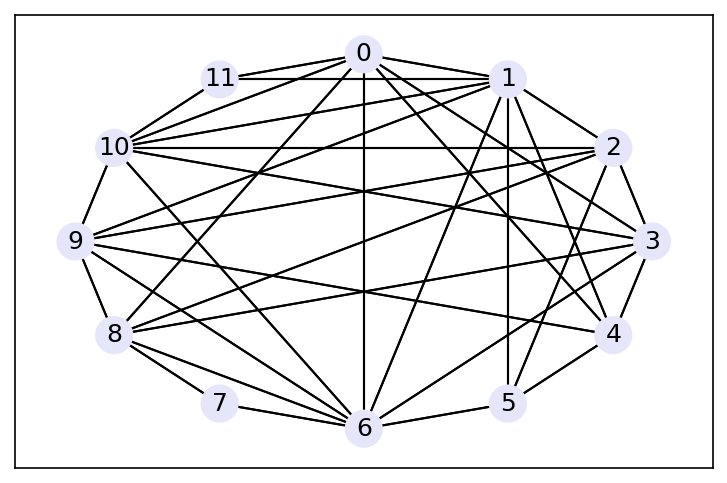

In [10]:
print("Переименуем вершины")

relabeled = {}
for i in range(n):
    relabeled[way[i]] = i

G = nx.relabel_nodes(G, relabeled)

used = [0 for i in used]

for x, y in G.edges():
    G[x][y]['color'] = 'black'

draw(False)

In [11]:
def print_matrix():
    print("\t" + ' '.join([f"v{i}" for i in range(n)]))
    for i in range(n):
        
        print(f"v{i}" + '\t' +  ' '.join([' ' * (v//10 + 1) + '1' if v in G[i] else ' ' * (v//10 + 1) + '0' for v in range(n)]))

In [12]:
print("Матрица смежности с перенумерованными вершинами: ")
print_matrix()

Матрица смежности с перенумерованными вершинами: 
	v0 v1 v2 v3 v4 v5 v6 v7 v8 v9 v10 v11
v0	 0  1  0  1  1  0  1  0  1  0   1   1
v1	 1  0  1  0  1  1  1  0  0  1   1   1
v2	 0  1  0  1  0  1  0  0  1  1   1   0
v3	 1  0  1  0  1  0  1  0  1  0   1   0
v4	 1  1  0  1  0  1  0  0  0  1   0   0
v5	 0  1  1  0  1  0  1  0  0  0   0   0
v6	 1  1  0  1  0  1  0  1  1  1   1   0
v7	 0  0  0  0  0  0  1  0  1  0   0   0
v8	 1  0  1  1  0  0  1  1  0  1   0   0
v9	 0  1  1  0  1  0  1  0  1  0   1   0
v10	 1  1  1  1  0  0  1  0  0  1   0   1
v11	 1  1  0  0  0  0  0  0  0  0   1   0


In [13]:
#def get_matrix(Gr):
#    return nx.adjacency_matrix(Gr).todense()

In [14]:
#mx = get_matrix(G)

In [15]:
#print(mx)

In [16]:
#for i in range(n):
#    for j in range(n):
#        k = mx[i, j] & 1 if i <= j else ' '
#        print(k , end = ' ')
#    print()

In [17]:
print("Построение графа пересечений G'")

Построение графа пересечений G'


In [18]:
p = [0 for i in range(n)]

rs = [[[] for i in range(n)] for j in range(n)]

for a in range(n):
    for b in range(a + 2, n):
        if not G.has_edge(a, b):
            continue
        #print(f"Ребро v{a + 1}v{b + 1} пересекается ребром", end = ' ')
        for c in range(a + 1, b):
            for d in range(b + 1, n):
                if G.has_edge(c, d):
                    p[a] += 1
                    rs[c][d].append((a, b))
                    #print(f"(v{c + 1}v{d + 1})", end = ',')

In [19]:
count = 0
nodes = []
for i in range(n):
    for j in range(i + 2, n):
        if len(rs[i][j]) != 0:
            ind = [f"v{a}v{b}" for (a, b) in rs[i][j]]
            print(f"Ребро v{i}v{j} пересекает ребра {ind}")
            count += 1
            if (i, j) not in nodes:
                nodes.append((i, j))
            for (a, b) in rs[i][j]:
                if (a, b) not in nodes:
                    nodes.append((a, b))
print(f"{len(nodes)} пересечений графа найдено, закончим поиск")

Ребро v1v4 пересекает ребра ['v0v3']
Ребро v1v5 пересекает ребра ['v0v3', 'v0v4']
Ребро v1v6 пересекает ребра ['v0v3', 'v0v4']
Ребро v1v9 пересекает ребра ['v0v3', 'v0v4', 'v0v6', 'v0v8']
Ребро v1v10 пересекает ребра ['v0v3', 'v0v4', 'v0v6', 'v0v8']
Ребро v1v11 пересекает ребра ['v0v3', 'v0v4', 'v0v6', 'v0v8', 'v0v10']
Ребро v2v5 пересекает ребра ['v0v3', 'v0v4', 'v1v4']
Ребро v2v8 пересекает ребра ['v0v3', 'v0v4', 'v0v6', 'v1v4', 'v1v5', 'v1v6']
Ребро v2v9 пересекает ребра ['v0v3', 'v0v4', 'v0v6', 'v0v8', 'v1v4', 'v1v5', 'v1v6']
Ребро v2v10 пересекает ребра ['v0v3', 'v0v4', 'v0v6', 'v0v8', 'v1v4', 'v1v5', 'v1v6', 'v1v9']
Ребро v3v6 пересекает ребра ['v0v4', 'v1v4', 'v1v5', 'v2v5']
Ребро v3v8 пересекает ребра ['v0v4', 'v0v6', 'v1v4', 'v1v5', 'v1v6', 'v2v5']
Ребро v3v10 пересекает ребра ['v0v4', 'v0v6', 'v0v8', 'v1v4', 'v1v5', 'v1v6', 'v1v9', 'v2v5', 'v2v8', 'v2v9']
Ребро v4v9 пересекает ребра ['v0v6', 'v0v8', 'v1v5', 'v1v6', 'v2v5', 'v2v8', 'v3v6', 'v3v8']
Ребро v6v9 пересекает ребра [

In [20]:
#print(nodes)

In [21]:
N = len(nodes)

In [22]:
B = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    for j in range(N):
        (a, b) = nodes[i]
        (c, d) = nodes[j]
        B[i][j] = 1 if nodes[i] in rs[c][d] or nodes[j] in rs[a][b]  or i == j else 0
        B[j][i] = B[i][j]

Переименуем вершины


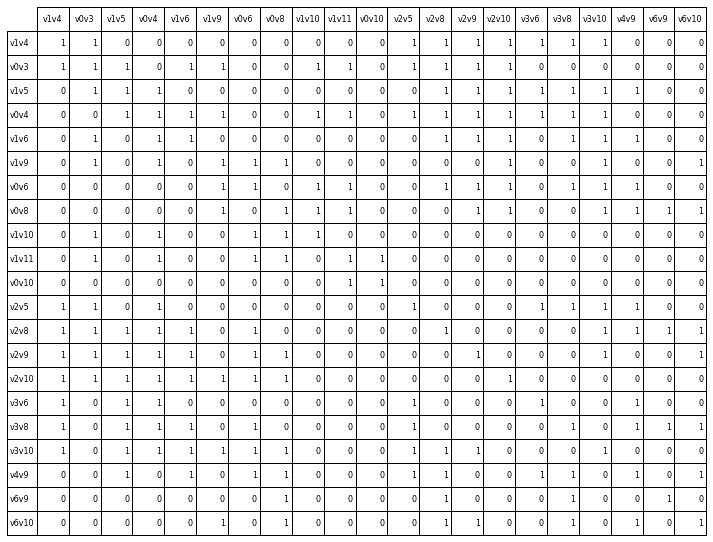

In [23]:
print("Переименуем вершины")
#print('\t', end = '')
title2 = []
for i in range(N):
    a, b = nodes[i]
    title2 += [f"v{a}v{b}"]
#print(' '.join(title2))
#for i in range(N):
#    (a, b) = nodes[i]
#    title1 = f"{i}\t"
#    print(title1 + ' '.join(str(B[i][j]) + (' ' * (len(str(j)) - len(str(B[i][j])))) for j in range(N)))

fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
table = plt.table(cellText=B,colLabels=title2, rowLabels = title2, loc="center")
table.scale(2, 2)
plt.show()

In [24]:
print("Построение семейства psi(G)")

Построение семейства psi(G)


In [25]:
def lor(x, y):
    z = [0 for i in range(len(x))]
    for i in range(len(x)):
        z[i] = x[i] + y[i]
    return z

ps = []

MAXN = 100500
    
def rec(i, k, psi):
    if(len(ps) == MAXN):
        return
    if 0 not in B[i]:
        print(f"Построено psi({len(ps)}) = {psi}")
        ps.append(psi)
        return
    #if 0 in B[i][:i]:
        #print("Незвоможно закрыть 0 стоящий на позиции " + str([j for j in range(i) if B[i][j] == 0]))
        #return
    for j in range(k + 1, N):
        if(len(ps) == MAXN):
            return
        if B[i][j] == 0:
            print(f"В строке {i} найден нулевой элемент r{j}")
            cp = [x for x in B[i]]
            print(f"Запишем дизьюнкцию M{''.join([str(val) for val in psi+[j]])}"
            f"= M{''.join(str(val) for val in psi)} v r{j}")
            print(''.join(str(val) for val in B[i]) + " v " + 
                  ''.join(str(val) for val in B[j]) + ' = ', end = '')
            
            B[i] = lor(B[i], B[j])
            print(''.join(str(val) for val in B[i]))
            print(f"Номера нулевых элементов: {[k for k in range(N) if B[i][k] == 0]}")
            rec(i, j, psi + [j])
            B[i] = [x for x in cp]

In [26]:
for i in range(N):
    rec(i, i, [i])
    #ps.append(i)

В строке 0 найден нулевой элемент r2
Запишем дизьюнкцию M02= M0 v r2
110000000001111111000 v 011100000000111111100 = 121100000001222222100
Номера нулевых элементов: [4, 5, 6, 7, 8, 9, 10, 19, 20]
В строке 0 найден нулевой элемент r4
Запишем дизьюнкцию M024= M02 v r4
121100000001222222100 v 010110000000111011100 = 131210000001333233200
Номера нулевых элементов: [5, 6, 7, 8, 9, 10, 19, 20]
В строке 0 найден нулевой элемент r5
Запишем дизьюнкцию M0245= M024 v r5
131210000001333233200 v 010101110000001001001 = 141311110001334234201
Номера нулевых элементов: [8, 9, 10, 19]
В строке 0 найден нулевой элемент r8
Запишем дизьюнкцию M02458= M0245 v r8
141311110001334234201 v 010100111000000000000 = 151411221001334234201
Номера нулевых элементов: [9, 10, 19]
В строке 0 найден нулевой элемент r9
Запишем дизьюнкцию M024589= M02458 v r9
151411221001334234201 v 010100110110000000000 = 161511331111334234201
Номера нулевых элементов: [19]
В строке 0 найден нулевой элемент r19
Запишем дизьюнкцию M024589

020210111110111011100 v 101100000001000100100 = 121310111111111111200
Номера нулевых элементов: [5, 19, 20]
В строке 4 найден нулевой элемент r19
Запишем дизьюнкцию M48101519= M481015 v r19
121310111111111111200 v 000000010000100010010 = 121310121111211121210
Номера нулевых элементов: [5, 20]
В строке 4 найден нулевой элемент r20
Запишем дизьюнкцию M4810151920= M48101519 v r20
121310121111211121210 v 000001010000110010101 = 121311131111321131311
Номера нулевых элементов: []
Построено psi(31) = [4, 8, 10, 15, 19, 20]
В строке 4 найден нулевой элемент r20
Запишем дизьюнкцию M48101520= M481015 v r20
121310111111111111200 v 000001010000110010101 = 121311121111221121301
Номера нулевых элементов: [19]
В строке 4 найден нулевой элемент r19
Запишем дизьюнкцию M481019= M4810 v r19
020210111110111011100 v 000000010000100010010 = 020210121110211021110
Номера нулевых элементов: [0, 2, 5, 11, 15, 20]
В строке 4 найден нулевой элемент r20
Запишем дизьюнкцию M48101920= M481019 v r20
02021012111021102

111201110111001101101 v 000000010000100010010 = 111201120111101111111
Номера нулевых элементов: [4, 8, 13]
В строке 5 найден нулевой элемент r16
Запишем дизьюнкцию M51016= M510 v r16
010101110110001001001 v 101110100001000010111 = 111211210111001011112
Номера нулевых элементов: [8, 12, 13, 15]
В строке 5 найден нулевой элемент r18
Запишем дизьюнкцию M51018= M510 v r18
010101110110001001001 v 001010110001100110101 = 011111220111101111102
Номера нулевых элементов: [0, 8, 13, 19]
В строке 5 найден нулевой элемент r19
Запишем дизьюнкцию M5101819= M51018 v r19
011111220111101111102 v 000000010000100010010 = 011111230111201121112
Номера нулевых элементов: [0, 8, 13]
В строке 5 найден нулевой элемент r19
Запишем дизьюнкцию M51019= M510 v r19
010101110110001001001 v 000000010000100010010 = 010101120110101011011
Номера нулевых элементов: [0, 2, 4, 8, 11, 13, 15, 18]
В строке 5 найден нулевой элемент r11
Запишем дизьюнкцию M511= M5 v r11
010101110000001001001 v 110100000001000111100 = 1202011100

Запишем дизьюнкцию M131419= M1314 v r19
222221220000011001001 v 000000010000100010010 = 222221230000111011011
Номера нулевых элементов: [8, 9, 10, 11, 15, 18]
В строке 13 найден нулевой элемент r15
Запишем дизьюнкцию M1315= M13 v r15
111110110000010001001 v 101100000001000100100 = 212210110001010101101
Номера нулевых элементов: [5, 8, 9, 10, 12, 14, 16, 19]
В строке 13 найден нулевой элемент r16
Запишем дизьюнкцию M131516= M1315 v r16
212210110001010101101 v 101110100001000010111 = 313320210002010111212
Номера нулевых элементов: [5, 8, 9, 10, 12, 14]
В строке 13 найден нулевой элемент r19
Запишем дизьюнкцию M131519= M1315 v r19
212210110001010101101 v 000000010000100010010 = 212210120001110111111
Номера нулевых элементов: [5, 8, 9, 10, 14]
В строке 13 найден нулевой элемент r16
Запишем дизьюнкцию M1316= M13 v r16
111110110000010001001 v 101110100001000010111 = 212220210001010011112
Номера нулевых элементов: [5, 8, 9, 10, 12, 14, 15]
В строке 13 найден нулевой элемент r18
Запишем дизьюн

In [27]:
MAXN = len(ps)
print(f"{MAXN} семейств psi найдено")
for i, psi in enumerate(ps):
    print(f"psi{i} = {psi}")

62 семейств psi найдено
psi0 = [0, 2, 4, 5, 8, 9, 19]
psi1 = [0, 2, 4, 5, 8, 10, 19]
psi2 = [0, 2, 4, 6, 7, 10]
psi3 = [0, 2, 4, 6, 10, 19, 20]
psi4 = [0, 2, 4, 8, 9, 19, 20]
psi5 = [0, 2, 4, 8, 10, 19, 20]
psi6 = [0, 3, 6, 7, 10]
psi7 = [0, 3, 6, 10, 19, 20]
psi8 = [0, 3, 10, 18, 19]
psi9 = [0, 5, 8, 9, 18, 19]
psi10 = [0, 5, 8, 10, 18, 19]
psi11 = [1, 3, 6, 7, 10]
psi12 = [1, 3, 6, 10, 19, 20]
psi13 = [1, 3, 10, 18, 19]
psi14 = [1, 6, 7, 10, 15]
psi15 = [1, 6, 10, 15, 19, 20]
psi16 = [1, 7, 10, 15, 16]
psi17 = [1, 10, 15, 16, 17]
psi18 = [1, 10, 15, 17, 19, 20]
psi19 = [1, 10, 17, 18, 19]
psi20 = [2, 4, 5, 8, 9, 11, 19]
psi21 = [2, 4, 5, 8, 10, 11, 19]
psi22 = [2, 4, 6, 7, 10, 11]
psi23 = [2, 4, 6, 10, 11, 19, 20]
psi24 = [2, 4, 8, 9, 11, 19, 20]
psi25 = [2, 4, 8, 10, 11, 19, 20]
psi26 = [4, 5, 8, 9, 15, 19]
psi27 = [4, 5, 8, 10, 15, 19]
psi28 = [4, 6, 7, 10, 15]
psi29 = [4, 6, 10, 15, 19, 20]
psi30 = [4, 8, 9, 15, 19, 20]
psi31 = [4, 8, 10, 15, 19, 20]
psi32 = [5, 8, 9, 11, 12, 13]


In [28]:
print("Выделение G' максимального двудольного графа H'")
print("Для каждой пары множеств посчитаем значение критерия")
print(f"Aij = |psi(i)| + |psi(j)| - |psi(i)&psi(j)|")
def cross(x, y):
    return [i for i in x if i in y]

def land(x, y):
    for i in range(len(x)):
        x[i] = x[i] & y[i]
    return x

def max_pair():
    mx = int(-1e9)
    
    i1,i2 = -1,-1

    for i in range(len(ps)):
        for j in range(i, len(ps)):
            A = len(ps[i])
            _B = len(ps[j])
            C = len(cross(ps[i], ps[j]))
            D = A + _B - C 
            if D >= mx:
                mx = D
                i1 = i
                i2 = j
    return i1, i2

def sublist(lst1, lst2):
    return all(x in lst2 for x in lst1) or all(x in lst1 for x in lst2)

def reduce(x, y, psi_index):
    global ps
    new_ps = []
    for psi in ps:
        if psi == psi1 or psi == psi2:
            continue
        for x in psi1:
            if x in psi:
                psi.remove(x)
        for y in psi2:
            if y in psi:
                psi.remove(y)
        ok = True
        for ps in new_ps:
            if sublist(psi, ps):
                ok = False
        if ok and len(psi) != 0:
            new_ps.append(psi)
    ps = new_ps
    nps = []
    for a in ps:
        ok = True
        for b in ps:
            if sublist(a, b) and len(a) < len(b):
                ok = False
        if ok:
            nps.append(a)
    ps = nps
    print("Удалим из psi(G) ребра вошедшие в другие множества. Объеденим одинаковые множества")
    real_index = psi_index * "\'"
    print(f"Назовем новые множества psi{real_index}")
    for i, psi in enumerate(ps):
        print(f"psi{real_index}({i}) = {[title2[x] for x in psi]}")

Выделение G' максимального двудольного графа H'
Для каждой пары множеств посчитаем значение критерия
Aij = |psi(i)| + |psi(j)| - |psi(i)&psi(j)|


Возьмем psi(23) и psi(47)
psi(23) = ['v1v5', 'v1v6', 'v0v6', 'v0v10', 'v2v5', 'v6v9', 'v6v10'] - проведем ребра внутри гамильтонового цикла
psi(47) = ['v1v10', 'v1v11', 'v2v8', 'v2v9', 'v2v10', 'v3v6', 'v3v8'] - проведем ребра вне гамильтонового цикла


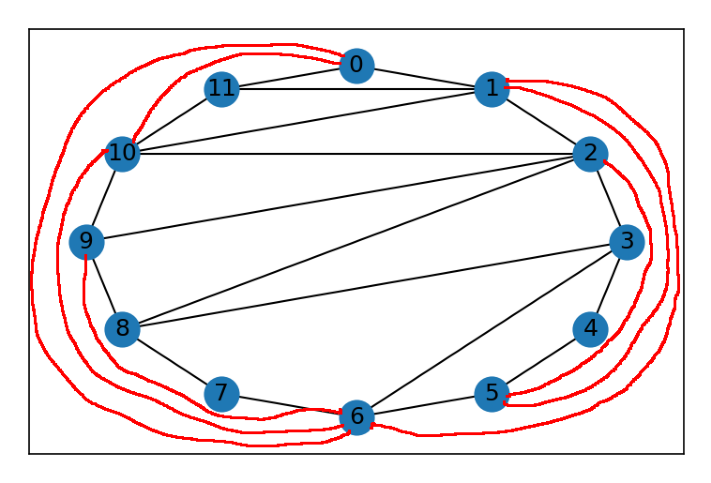

Удалим из psi(G) ребра вошедшие в другие множества. Объеденим одинаковые множества
Назовем новые множества psi'
psi'(0) = ['v1v4', 'v1v9']
psi'(1) = ['v1v4', 'v0v8']
psi'(2) = ['v1v4', 'v0v4']
psi'(3) = ['v0v3', 'v0v4', 'v0v8']
psi'(4) = ['v0v3', 'v0v4', 'v4v9']
psi'(5) = ['v0v3', 'v3v10']
psi'(6) = ['v1v9', 'v4v9']
psi'(7) = ['v3v10', 'v4v9']
Возьмем psi'(3) и psi'(7)
psi(3) = ['v0v3', 'v0v4', 'v0v8'] - проведем ребра внутри гамильтонового цикла
psi(7) = ['v3v10', 'v4v9'] - проведем ребра вне гамильтонового цикла


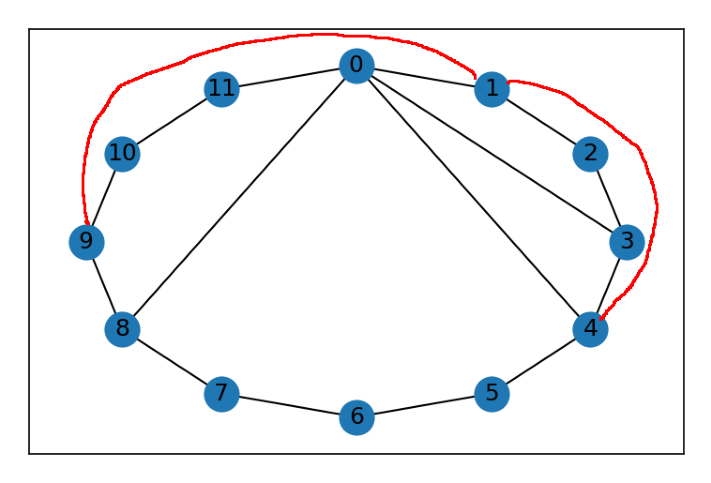

Удалим из psi(G) ребра вошедшие в другие множества. Объеденим одинаковые множества
Назовем новые множества psi''
psi''(0) = ['v1v4', 'v1v9']
Возьмем psi''(0) и psi''(0)
psi(0) = ['v1v4', 'v1v9'] - проведем ребра внутри гамильтонового цикла


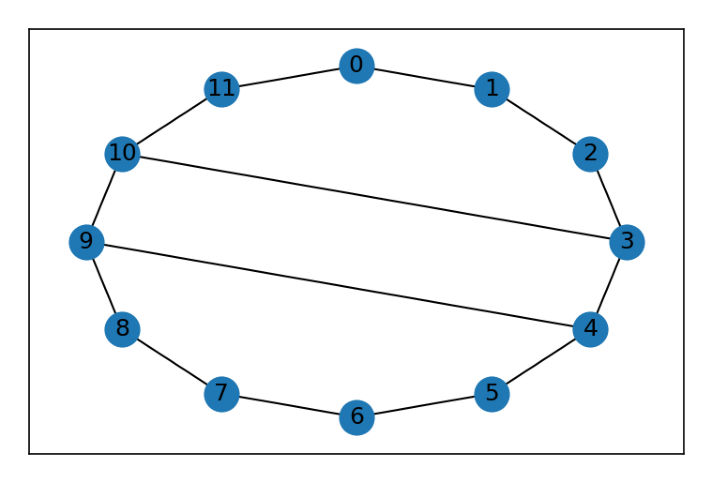

Удалим из psi(G) ребра вошедшие в другие множества. Объеденим одинаковые множества
Назовем новые множества psi'''


In [29]:
import matplotlib.image as mpimg
image_index = 0
while True:
    i1, i2 = max_pair()
    if i1 == -1 or i2 == -1:
        break
    real_index = image_index * "\'"
    print(f"Возьмем psi{real_index}({i1}) и psi{real_index}({i2})")
    title2 = []
    for (a, b) in nodes:
        title2 += [f"v{a}v{b}"]
    
    psi1 = ps[i1]
    psi2 = ps[i2]
    
    s1 = [title2[x] for x in psi1]
    s2 = [title2[y] for y in psi2]


    print(f"psi({i1}) = {s1} - проведем ребра внутри гамильтонового цикла")
    if i1 != i2:
        print(f"psi({i2}) = {s2} - проведем ребра вне гамильтонового цикла")
    plt.figure(dpi=150)
    plt.axis('off')
    img = mpimg.imread(f"images/im{image_index}.png")
    imgplot = plt.imshow(img)
    plt.show()
    image_index += 1
    reduce(i1, i2, image_index)

In [30]:
print("Толщина графа равна 3")

Толщина графа равна 3
